# Histopathologic Cancer Detection: Problem and Data Description

## Problem Description

### What is Histopathologic Cancer Detection?

Histopathology is the microscopic examination of tissue samples to study the manifestations of disease. Pathologists examine tissue sections under a microscope to identify abnormal cells and patterns that may indicate cancer or other diseases. This process is crucial for cancer diagnosis, staging, and treatment planning.

In the Histopathologic Cancer Detection challenge, the goal is to create an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans. Specifically, we are tasked with determining whether the center 32x32px region of a 96x96px patch contains at least one pixel of tumor tissue.

As described in the Kaggle competition:

> In this competition, you must create an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans. The data for this competition is a slightly modified version of the PatchCamelyon (PCam) benchmark dataset (the original PCam dataset contains duplicate images due to its probabilistic sampling, however, the version presented on Kaggle does not contain duplicates).

### The Challenge of Metastatic Cancer Detection

Metastatic cancer occurs when cancer cells break away from the primary tumor site, travel through the blood or lymphatic system, and form new tumors in other parts of the body. Detecting these metastases is critical for:

- **Accurate cancer staging**: The presence and extent of metastases determine the cancer stage, which guides treatment decisions.
- **Treatment planning**: Different treatment approaches may be needed for metastatic versus non-metastatic cancer.
- **Prognosis assessment**: Metastatic cancer generally has a poorer prognosis than localized cancer.

However, manual examination of histopathology slides is:
- Time-consuming: Pathologists must carefully examine large tissue samples
- Subject to variability: Different pathologists may interpret the same slide differently
- Prone to human error: Fatigue and workload can affect accuracy

Automated detection systems using machine learning can help address these challenges by providing consistent, rapid, and potentially more accurate assessments.

## Medical Importance

### Why is This Problem Important?

Developing accurate automated systems for histopathologic cancer detection has several significant benefits:

#### Clinical Benefits
- **Improved diagnostic accuracy**: Reducing human error and variability in interpretation
- **Faster diagnosis**: Accelerating the diagnostic process, potentially leading to earlier treatment
- **Reduced workload for pathologists**: Allowing them to focus on more complex cases
- **Standardization**: Providing consistent diagnostic criteria across different healthcare settings

#### Research Benefits
- **Quantitative analysis**: Enabling more precise measurement of disease characteristics
- **Large-scale studies**: Facilitating research on large datasets that would be impractical to analyze manually
- **Novel biomarker discovery**: Potentially identifying subtle patterns associated with disease outcomes

#### Global Health Impact
- **Addressing pathologist shortages**: Many regions worldwide have insufficient pathology expertise
- **Telemedicine support**: Enhancing remote diagnostic capabilities
- **Democratizing expertise**: Making high-quality diagnostic support more widely available

### Current State of Automated Histopathology Analysis

Recent advances in deep learning have shown promising results in histopathology image analysis. Several studies have demonstrated that convolutional neural networks (CNNs) can achieve performance comparable to or even exceeding that of pathologists in specific diagnostic tasks.

However, challenges remain in:
- Generalizability across different laboratories and staining protocols
- Interpretability of model decisions
- Integration into clinical workflows
- Regulatory approval for clinical use

This project contributes to the ongoing effort to improve automated histopathologic analysis by developing and evaluating models for metastatic cancer detection.

## Dataset Description

### Dataset Overview

The dataset for this project comes from the PatchCamelyon (PCam) benchmark dataset, which is derived from the Camelyon16 challenge. It consists of histopathologic scans of lymph node sections, where the task is to identify metastatic tissue.

As described in the Kaggle competition:

> PCam is highly interesting for both its size, simplicity to get started on, and approachability. In the authors' words:
>
> [PCam] packs the clinically-relevant task of metastasis detection into a straight-forward binary image classification task, akin to CIFAR-10 and MNIST. Models can easily be trained on a single GPU in a couple hours, and achieve competitive scores in the Camelyon16 tasks of tumor detection and whole-slide image diagnosis. Furthermore, the balance between task-difficulty and tractability makes it a prime suspect for fundamental machine learning research on topics as active learning, model uncertainty, and explainability.

The PCam dataset was created to serve as a benchmark for machine learning algorithms in medical image analysis, providing a more accessible format than the original whole-slide images. The version used in the Kaggle competition is slightly modified from the original PCam dataset in that it does not contain duplicate images that were present in the original due to probabilistic sampling.

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Set paths to the dataset
# Note: Update these paths based on your local setup
BASE_DIR = '../data'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
TRAIN_LABELS_PATH = os.path.join(BASE_DIR, 'train_labels.csv')

In [10]:
# Load the training labels
try:
    train_labels = pd.read_csv(TRAIN_LABELS_PATH)
    print(f"Successfully loaded training labels with shape: {train_labels.shape}")
    print("\nSample of training labels:")
    display(train_labels.head())
except Exception as e:
    print(f"Error loading training labels: {e}")
    print("Please ensure the dataset is downloaded and the paths are correctly set.")

Successfully loaded training labels with shape: (220025, 2)

Sample of training labels:


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


### Dataset Characteristics

#### Image Properties
- **Image format**: The images are provided in standard image formats (e.g., JPEG, PNG)
- **Image dimensions**: Each patch is 96×96 pixels
- **Color channels**: RGB (3 channels)
- **Resolution**: The images represent a 96×96μm area of the original slide (at 10× magnification)
- **Task**: Determine whether the center 32×32px region contains at least one pixel of tumor tissue

#### Dataset Size
- **Training set**: Approximately 220,000 images
- **Test set**: Approximately 57,500 images

#### Class Distribution
The dataset has two classes:
- **Class 0**: Normal tissue (no metastatic cancer)
- **Class 1**: Metastatic cancer tissue

Let's examine the class distribution in the training set:

In [1]:
# Analyze class distribution
try:
    class_distribution = train_labels['label'].value_counts()
    print("Class distribution in training set:")
    print(class_distribution)
    
    # Calculate percentages
    class_percentages = class_distribution / len(train_labels) * 100
    print("\nClass distribution percentages:")
    for label, percentage in class_percentages.items():
        print(f"Class {label}: {percentage:.2f}%")
    
    # Visualize class distribution
    plt.figure(figsize=(8, 6))
    plt.bar(['Normal Tissue (0)', 'Metastatic Cancer (1)'], class_distribution.values)
    plt.title('Class Distribution in Training Set')
    plt.ylabel('Number of Samples')
    plt.grid(axis='y', alpha=0.3)
    for i, count in enumerate(class_distribution.values):
        plt.text(i, count + 500, f"{count}\n({class_percentages.values[i]:.1f}%)", 
                 ha='center', va='bottom')
    plt.show()
except Exception as e:
    print(f"Error analyzing class distribution: {e}")
    print("This will be completed once the dataset is loaded.")

Error analyzing class distribution: name 'train_labels' is not defined
This will be completed once the dataset is loaded.


### Data Source and Context

#### Origin of the Data

The PCam dataset is derived from the Camelyon16 challenge, which was organized to evaluate algorithms for detecting metastatic breast cancer in lymph node tissue. The original Camelyon16 dataset consists of whole-slide images (WSIs) of lymph node sections from two medical centers in the Netherlands:

- Radboud University Medical Center (Nijmegen)
- University Medical Center Utrecht

The slides were digitized using a 40× objective lens, resulting in a pixel resolution of 0.243 microns. For the PCam dataset, patches of 96×96 pixels were extracted from these WSIs.

#### Medical Context

In breast cancer staging, examining lymph nodes for metastases is a critical step. Sentinel lymph node biopsy (SLNB) is a procedure where the first lymph node(s) to which cancer is likely to spread is removed and examined. The presence of metastatic cells in these lymph nodes indicates that the cancer has begun to spread beyond the primary tumor site.

The traditional workflow for lymph node examination involves:
1. Surgical removal of lymph nodes
2. Preparation of tissue sections (fixing, embedding, sectioning, staining)
3. Microscopic examination by a pathologist
4. Diagnosis based on the presence or absence of cancer cells

This dataset represents step 3 in this process, where tissue sections have been digitized for analysis.

#### Staining Technique

The tissue sections in this dataset are stained with Hematoxylin and Eosin (H&E), which is the standard staining method in histopathology:
- **Hematoxylin**: Stains cell nuclei blue/purple
- **Eosin**: Stains cytoplasm and extracellular matrix pink/red

This staining allows pathologists (and our algorithms) to distinguish different cellular structures and identify abnormal patterns characteristic of cancer.

### Visualization of Sample Images

Let's visualize some sample images from both classes to better understand the data:

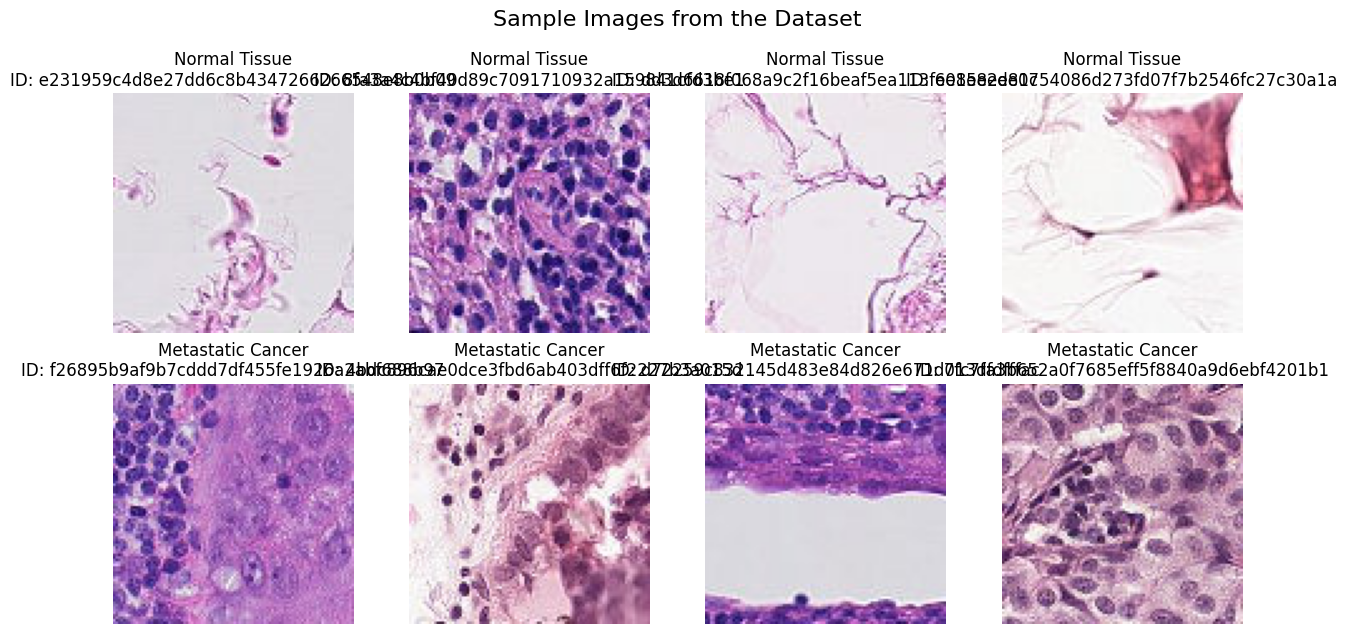

In [12]:
def load_and_display_samples(num_samples=4):
    """Load and display sample images from each class"""
    try:
        # Get sample IDs for each class
        normal_samples = train_labels[train_labels['label'] == 0]['id'].sample(num_samples).values
        cancer_samples = train_labels[train_labels['label'] == 1]['id'].sample(num_samples).values
        
        # Set up the figure
        fig, axes = plt.subplots(2, num_samples, figsize=(num_samples*3, 6))
        
        # Display normal tissue samples
        for i, sample_id in enumerate(normal_samples):
            img_path = os.path.join(TRAIN_DIR, f"{sample_id}.tif")
            img = Image.open(img_path)
            axes[0, i].imshow(img)
            axes[0, i].set_title(f"Normal Tissue\nID: {sample_id}")
            axes[0, i].axis('off')
        
        # Display cancer tissue samples
        for i, sample_id in enumerate(cancer_samples):
            img_path = os.path.join(TRAIN_DIR, f"{sample_id}.tif")
            img = Image.open(img_path)
            axes[1, i].imshow(img)
            axes[1, i].set_title(f"Metastatic Cancer\nID: {sample_id}")
            axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.suptitle("Sample Images from the Dataset", fontsize=16, y=1.05)
        plt.show()
        
    except Exception as e:
        print(f"Error displaying sample images: {e}")
        print("This will be completed once the dataset is loaded.")

# Display sample images
load_and_display_samples()

## Evaluation Metric

### Competition Metric

The primary evaluation metric for this competition is the Area Under the ROC Curve (AUC-ROC). This metric is particularly suitable for binary classification problems, especially when dealing with medical diagnoses.

As stated in the Kaggle competition:

> Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

#### Why AUC-ROC?

- **Threshold-independent**: AUC-ROC evaluates the model's performance across all possible classification thresholds, not just at a single decision threshold.
- **Balanced assessment**: It works well even with imbalanced datasets, as it considers both sensitivity (true positive rate) and specificity (true negative rate).
- **Interpretability**: The AUC value represents the probability that the model ranks a random positive example higher than a random negative example.

#### Interpretation of AUC-ROC Values:
- **AUC = 0.5**: The model has no discriminative ability (equivalent to random guessing)
- **0.5 < AUC < 0.7**: Poor discrimination
- **0.7 ≤ AUC < 0.8**: Acceptable discrimination
- **0.8 ≤ AUC < 0.9**: Excellent discrimination
- **AUC ≥ 0.9**: Outstanding discrimination

In the medical context of cancer detection, a high AUC is particularly important as it indicates the model's ability to correctly distinguish between cancerous and non-cancerous tissue, minimizing both false positives and false negatives.

### Submission Format

For the Kaggle competition, submissions must be in a specific format. As described in the competition:

> For each id in the test set, you must predict a probability that center 32x32px region of a patch contains at least one pixel of tumor tissue. The file should contain a header and have the following format:
>
> ```
> id,label
> 0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
> 95596b92e5066c5c52466c90b69ff089b39f2737,0
> 248e6738860e2ebcf6258cdc1f32f299e0c76914,0
> etc.
> ```

This format requires us to output a probability (between 0 and 1) for each image in the test set, indicating the likelihood that the center region contains tumor tissue.

## Challenges and Considerations

### Technical Challenges

Several technical challenges are associated with histopathologic image analysis:

- **Visual complexity**: Histopathology images contain complex patterns and structures that can be difficult to interpret
- **Staining variations**: Differences in staining protocols and digitization can affect image appearance
- **Contextual information**: The 96×96 pixel patches may lack broader contextual information from the whole slide
- **Subtle differences**: The visual differences between normal and cancerous tissue can be subtle and require expert knowledge to identify
- **Computational requirements**: Processing and analyzing large numbers of high-resolution images requires significant computational resources

### Clinical Considerations

From a clinical perspective, several factors are important to consider:

- **False negatives**: Missing cancer (false negatives) can lead to delayed treatment and poorer outcomes
- **False positives**: Incorrectly identifying normal tissue as cancerous (false positives) can lead to unnecessary treatments and patient anxiety
- **Interpretability**: Clinicians need to understand why the model made a particular prediction
- **Integration**: How the model would integrate into existing clinical workflows
- **Regulatory approval**: Requirements for using AI systems in clinical practice

These considerations will guide our approach to model development and evaluation.